In [3]:
! pip install scikit-dsp-comm

In [4]:
import math
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [5]:
E_s = 1
noise_power_db = np.arange(-30, 0.5, 0.01)
noise_power = 10**(noise_power_db / 10)
SNR = E_s/noise_power

In [6]:
def Q(x):
    return 1/2*scipy.special.erfc(x/np.sqrt(2))

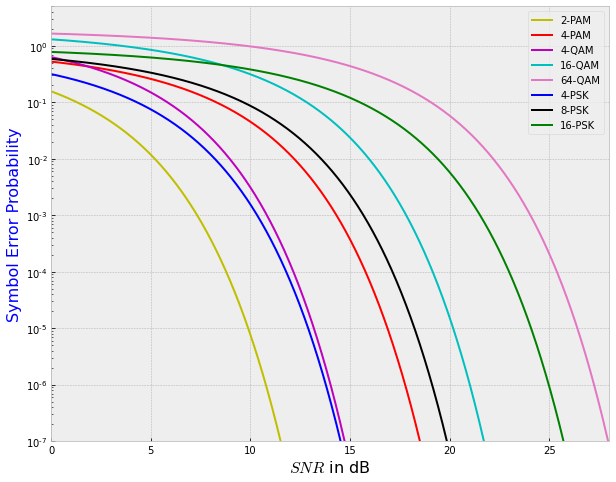

In [7]:
#2-PAM
order = 2
error_probability_2pam  = 2*Q(np.sqrt((6/(order**2-1)) * SNR))
bit_error_rate_2pam = error_probability_2pam/(np.log2(order))

#4-PAM
order = 4
error_probability_4pam  = 2*Q(np.sqrt((6/(order**2-1)) * SNR))
bit_error_rate_4pam = error_probability_4pam/(np.log2(order))

#4-QAM
order = 4
error_probability_4qam  = 4*Q(np.sqrt((3/(order-1)) * SNR)) 
bit_error_rate_4qam = error_probability_4qam/(np.log2(order))

#16-QAM
order = 16
error_probability_16qam  = 4*Q(np.sqrt((3/(order-1)) * SNR)) 
bit_error_rate_16qam = error_probability_16qam/(np.log2(order))

#64-QAM
order = 64
error_probability_64qam  = 4*Q(np.sqrt((3/(order-1)) * SNR)) 
bit_error_rate_64qam = error_probability_64qam/(np.log2(order))

#4-PSK
order = 4
error_probability_4psk  = 2*Q(np.sqrt(2*SNR)*np.sin(np.pi/order))
bit_error_rate_4psk = error_probability_4psk/(np.log2(order))

#8-PSK
order = 8
error_probability_8psk  = 2*Q(np.sqrt(2*SNR)*np.sin(np.pi/order))
bit_error_rate_8psk = error_probability_8psk/(np.log2(order))

#16-PSK
order = 16
error_probability_16psk  = 2*Q(np.sqrt(2*SNR)*np.sin(np.pi/order)) 
bit_error_rate_16psk = error_probability_16psk/(np.log2(order))

###
plt.figure(1,figsize=(10,8))
plt.plot()
plt.semilogy(10 * np.log10(SNR), error_probability_2pam,'y',label='2-PAM');
plt.semilogy(10 * np.log10(SNR), error_probability_4pam,'r',label='4-PAM');
plt.semilogy(10 * np.log10(SNR), error_probability_4qam,'m',label='4-QAM');
plt.semilogy(10 * np.log10(SNR), error_probability_16qam,'c',label='16-QAM');
plt.semilogy(10 * np.log10(SNR), error_probability_64qam,'tab:pink',label='64-QAM');
plt.semilogy(10 * np.log10(SNR), error_probability_4psk,'b',label='4-PSK');
plt.semilogy(10 * np.log10(SNR), error_probability_8psk,'k',label='8-PSK');
plt.semilogy(10 * np.log10(SNR), error_probability_16psk,'g',label='16-PSK');
plt.axis([0, 28, 10**-7, 5])
plt.xlabel('$SNR$ in dB',fontsize=16)
plt.ylabel('Symbol Error Probability', color='b',fontsize=16)
plt.legend();

2-PAM = 1 bits/s/Hz <br>
4-PAM / 4-QAM / 4-PSK = 2 bits/s/Hz <br>
8-PSK = 3 bits/s/Hz <br>
16-QAM / 16-PSK = 4 bits/s/Hz <br>
64-QAM = 6 bits/s/Hz <br>

From the graph it can be clearly seen that when there is less bits usable in modulation, less SNR is needed to achieve lower symbol error probabilities. For example with 2-PAM modulation an SNR of 10dB is needed to achieve 10^-5 error probability while with 16-QAM an SNR of 20dB is needed to achieve the same. The downside here is the lost spectral efficiency in lower M size modulations compared to higher ones. There is a clear trade-off between how low error probability is wanted and how much signal power is possible to use and what spectral efficiency is needed.  

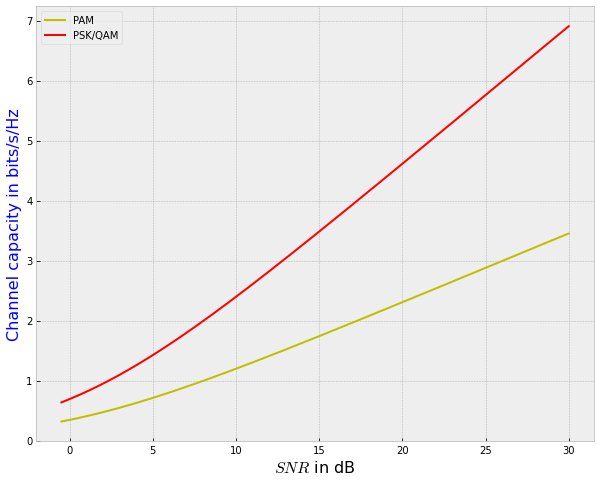

In [9]:
plt.figure(1,figsize=(10,8))
plt.plot(10 * np.log10(SNR), 0.5*np.log(1+SNR),'y',label='PAM');
plt.plot(10 * np.log10(SNR), np.log(1+SNR),'r',label='PSK/QAM');
plt.xlabel('$SNR$ in dB',fontsize=16)
plt.ylabel('Channel capacity in bits/s/Hz', color='b',fontsize=16)
plt.legend();